<h1> Cells size adjustments </h1>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

<h1> Libreries </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1> matplotlib settings </h1>

In [3]:
%matplotlib notebook
"""
https://nbviewer.org/ copy and paste URL address at 
this link in order to have a reliable view of the code
"""
plt.rcParams [ 'axes.labelsize' ] = 18
plt.rcParams [ 'lines.linewidth' ] = 4
plt.rcParams [ 'figure.figsize' ] = ( 8 , 4)
plt.rcParams [ 'font.size' ] = 9

<h1> Matplotlib grid settings </h1>

In [4]:
class plotSett:
    def __init__(self, fig, plt = plt, font = 20, title = 'Title', fontx = None, fonty = None):
        self.font = font
        self.title = title
        self.fig = fig
        self.ax = self.fig.add_subplot(111)
        
        if fontx == None:
            fontx = self.font
        if fonty == None:
            fonty = self.font
        

        self.ax.set_title(title, fontdict={'fontsize': self.font })
        self.ax.xaxis.set_tick_params(labelsize = fontx)
        self.ax.yaxis.set_tick_params(labelsize = fonty)
        
    def grid(self, xmin = 0, xmax = 1, xstepM = 0.1, xstepm = 0.05, \
             ymin = 0, ymax = 1, ystepM = 0.1, ystepm = 0.05,\
             sizeMinor = 0.2, sizeMajor = 1): # line size

        Xmajor_ticks = np.arange(xmin, xmax, xstepM)
        Xminor_ticks = np.arange(xmin, xmax, xstepm)
        Ymajor_ticks = np.arange(ymin, ymax, ystepM)
        Yminor_ticks = np.arange(ymin, ymax, ystepm)

        self.ax.set_xlim(xmin, xmax)
        self.ax.set_xticks(Xmajor_ticks)
        self.ax.set_xticks(Xminor_ticks, minor=True)
    
        self.ax.set_ylim(ymin, ymax)
        self.ax.set_yticks(Ymajor_ticks)
        self.ax.set_yticks(Yminor_ticks, minor=True)

        # And a corresponding grid
        #self.ax.grid(which='both')
        self.ax.grid(which='minor', alpha=0.2)
        self.ax.grid(which='major', alpha=0.5)

In [5]:
x = np.arange(-3, 3, 0.01)
y = np.sin(np.pi*x)/(np.pi*x)

<h1> Using "plotSett" for a good grid </h1>

<IPython.core.display.Javascript object>


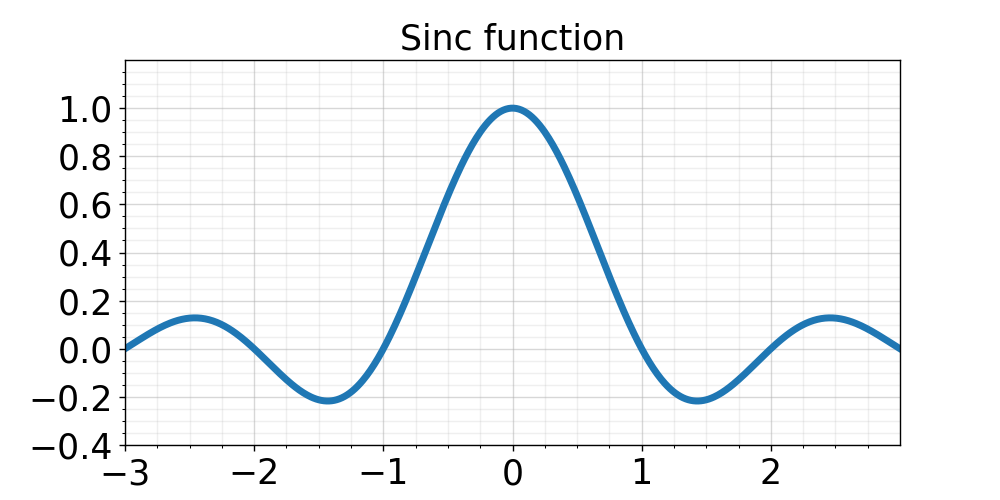

In [6]:
fig = plt.figure()

a = plotSett(fig = fig, title = 'Sinc function')
u = a.grid(-3, 3, 1, 0.25, -0.4, 1.2, 0.2, 0.05)
plt.plot(x, y)

<h1> A double y axis plot <h1>

<IPython.core.display.Javascript object>


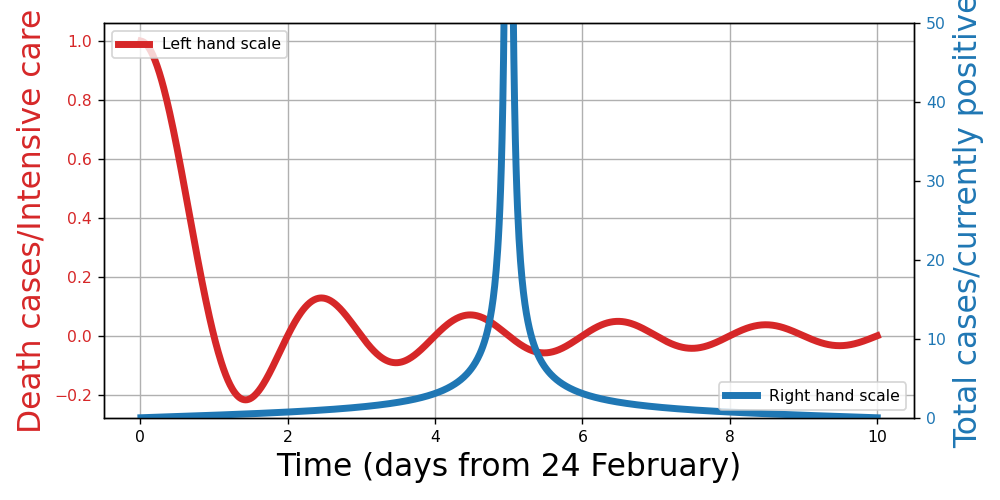

In [10]:
x = np.arange(0.01, 10.01, 0.01)
y1 = np.sin(np.pi*x)/(np.pi*x)
y2 = abs(np.tan(0.1*np.pi*x))

# Create some mock data
fig, ax1 = plt.subplots()

ax1.grid()

color = 'tab:red'
ax1.set_xlabel('Time (days from 24 February)')
ax1.set_ylabel('Death cases/Intensive care', color=color)
#ax1.set_xlim(0, 15)
#ax1.set_ylim(0, 900)
ax1.plot(x, y1, '-', color=color, label = 'Left hand scale')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc = 'upper left')

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Total cases/currently positive', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, '-', color=color, label = 'Right hand scale')
ax2.set_ylim(0, 50)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc = 'lower right')

fig.tight_layout()  

plt.show()